modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Shape of each embedding: (384,)
Number of embeddings: 6


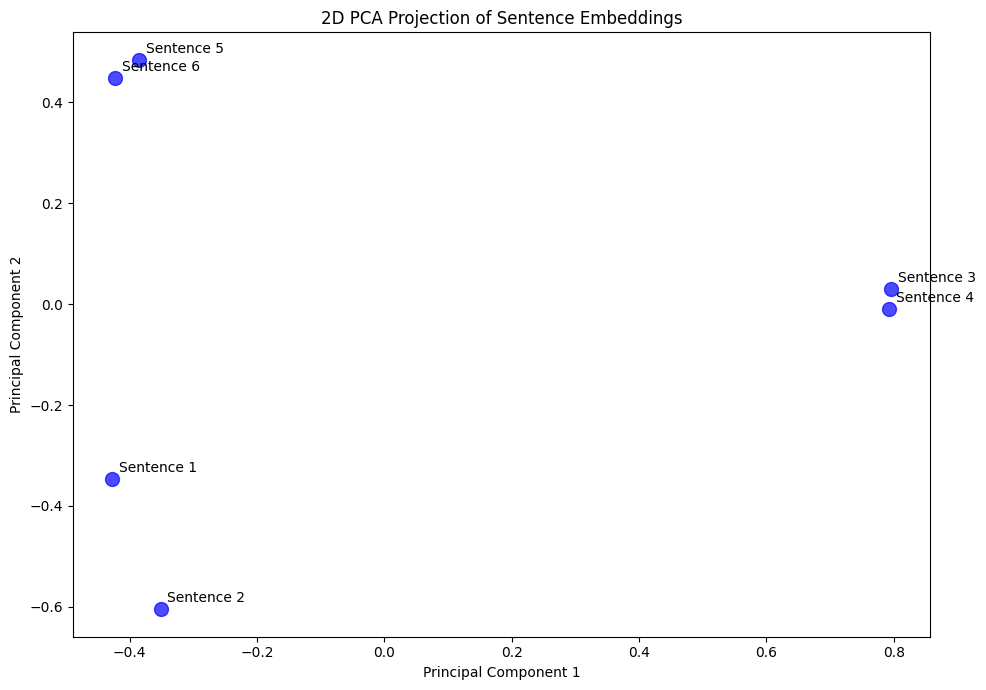

Similarity between "I love machine learning and artificial intelligence." and "AI and ML are fascinating fields of study.": 0.6934
Similarity between "The weather is beautiful today." and "It's a sunny day with clear skies.": 0.6957
Similarity between "Python is my favorite programming language." and "I enjoy coding in Python for data analysis.": 0.7249
Similarity between "I love machine learning and artificial intelligence." and "The weather is beautiful today.": 0.0295
Similarity between "AI and ML are fascinating fields of study." and "Python is my favorite programming language.": 0.2927


In [1]:
# Installing necessary packages
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer

# Load a pre-trained Sentence Transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Example sentences
sentences = [
    "I love machine learning and artificial intelligence.",
    "AI and ML are fascinating fields of study.",
    "The weather is beautiful today.",
    "It's a sunny day with clear skies.",
    "Python is my favorite programming language.",
    "I enjoy coding in Python for data analysis."
]

# Create embeddings for the sentences
embeddings = model.encode(sentences)

print(f"Shape of each embedding: {embeddings[0].shape}")
print(f"Number of embeddings: {len(embeddings)}")

# Visualize embeddings in 2D using PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 7))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1],
            c='blue', alpha=0.7, s=100)

# Add labels to the points
for i, sentence in enumerate(sentences):
    plt.annotate(f"Sentence {i+1}",
                 xy=(embeddings_2d[i, 0], embeddings_2d[i, 1]),
                 xytext=(5, 5),
                 textcoords='offset points')

plt.title("2D PCA Projection of Sentence Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.tight_layout()
plt.show()

# Calculate and print cosine similarity between different sentence pairs
def print_similarity(sent1_idx, sent2_idx):
    sim = cosine_similarity([embeddings[sent1_idx]], [
                            embeddings[sent2_idx]])[0][0]
    print(
        f"Similarity between \"{sentences[sent1_idx]}\" and \"{sentences[sent2_idx]}\": {sim:.4f}")


# Similar sentences
print_similarity(0, 1)  # AI-related sentences
print_similarity(2, 3)  # Weather-related sentences
print_similarity(4, 5)  # Python-related sentences

# Dissimilar sentences
print_similarity(0, 2)  # AI vs. Weather
print_similarity(1, 4)  # AI vs. Python